# Potential Correlations and Analyses

## Player Performance Metrics vs. Economy Rounds
- Correlate **"Econ" rating** with:
  - **"Kills Per Round (KPR)"**
  - **"Assists Per Round (APR)"**
  - **"Rating (R)"**
- Analyze how **economy round types** (e.g., eco, semi-eco) influence player performance metrics.

## Agent Picks and Match Outcomes
- Examine correlations between **"Pick Rate"** and **"Total Wins By Map"** to identify strong agent-map combinations.
- Analyze **"Attacker Side Win Percentage"** and **"Defender Side Win Percentage"** based on agent picks.

## Map Characteristics and Team Success
- Analyze correlations between:
  - **"Attacker Side Win Percentage"** and **"Team Attacker Score"**
  - **"Defender Side Win Percentage"** and **"Team Defender Score"**
- Investigate if **"Total Maps Played"** affects win rates on specific maps.

## Impact of Loadout Value
- Compare **"Loadout Value"** with:
  - **"Remaining Credits"**
  - **"Type"**  
  To determine their effect on winning specific economy rounds.
- Study **"Loadout Value"** impact on:
  - **"Kills"**
  - **"Spike Plants"**
  - **"Spike Defuse"**

## Clutch Success and Player Metrics
- Investigate correlations between:
  - **"Clutch Success %"** and **"Kills"**
  - **"Clutch Success %"** and **"Assists"**
  - **"Clutch Success %"** and **"First Kills"**
- Analyze how **"Clutch Success %"** affects the overall **"Rating (R)"**.

## Game Durations and Strategy
- Correlate **"Duration"** with:
  - **"Team Score"**
  - **"Eliminations"**
  - **"Spike Defuse"** strategies  
  To understand how strategies evolve in longer matches.

---

# Techniques to Apply

## Apriori Algorithm
- Identify frequent patterns in:
  - **"Agent Picks"**
  - **"Winning Economy Types"**
  - **"Map-Based Wins"**
- Example:  
  *Rules like "If a team spends $$ (Semi-buy) and plays Agent X, the win rate is higher on Map Y."*

## K-means Clustering
- Cluster players based on:
  - **"Rating (R)"**
  - **"Kills"**
  - **"KAST"**
  - **"ACS"**  
  To classify player performance levels.
- Group maps by similarities in **"Attacker/Defender Win Percentages"**.

## EM Clustering (Gaussian Mixture Models)
- Identify latent patterns in:
  - **"Spike Plants"**
  - **"Eliminations"**
  - **"Eco (won)" metrics**
- Example:  
  *Classify rounds based on complex relationships like credits spent and strategies used.*

## DBScan Clustering
- Find anomalies in performance data:
  - Players with exceptionally high **"Kills Per Round"** or **"Clutch Success %"**
- Analyze unusual strategies based on **"Remaining Credits"** and **"Econ"**.

## SLINK Clustering
- Hierarchically cluster teams or players based on multidimensional performance statistics.
- Example:  
  *Discover tiers of teams based on "Team Score," "Kills Per Round," and "Duration."*

## Linear Regression
- Predict **"Rating (R)"** based on:
  - **"Kills"**
  - **"Assists"**
  - **"ACS"**
  - **"Clutch Success %"**
- Model **"Attacker Side Win Percentage"** as a function of **"Agent Picks"** and **"Loadout Value"**.

---

# Action Plan

## 1. Data Cleaning
- Handle missing values.
- Normalize numerical data.
- Encode categorical variables like **"Type"** and **"Agent"**.

## 2. Exploratory Data Analysis (EDA)
- Visualize distributions, correlations, and outliers using:
  - Scatter plots
  - Boxplots
  - Heatmaps

## 3. Feature Selection
- Identify the most impactful features for clustering or prediction using:
  - Statistical tests
  - Feature importance techniques.

## 4. Apply Techniques
- Run clustering algorithms to identify patterns or groupings.
- Use regression to predict or explain relationships between variables.
- Use association rule mining to extract meaningful game strategies.

## 5. Interpret Results
- Validate findings using:
  - Cross-validation
  - Statistical metrics (e.g., R² for regression, silhouette score for clustering).


In [28]:
#INITIALIZE LIBRARIES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os


In [29]:

#FILE PATHS

## AGENTS
file_path_agentPickRate = r"Dataset3\vct_2024\agents\agents_pick_rates.csv"
file_path_mapsStats = r"Dataset3\vct_2024\agents\maps_stats.csv"
file_path_teamsPickedAgents = r"Dataset3\vct_2024\agents\teams_picked_agents.csv"

## IDS
file_path_playersIds = r"Dataset3\vct_2024\ids\players_ids.csv"
file_path_teamsIds = r"Dataset3\vct_2024\ids\teams_ids.csv"
file_path_tournaments_stages_match_types_ids = r"Dataset3\vct_2024\ids\tournaments_stages_match_types_ids.csv"
file_path_tournaments_stages_matches_games_ids = r"Dataset3\vct_2024\ids\tournaments_stages_matches_games_ids.csv"

## MATCHES
file_path_draftPhase = r"Dataset3\vct_2024\matches\draft_phase.csv"
file_path_ecoRounds = r"Dataset3\vct_2024\matches\eco_rounds.csv"
file_path_ecoStats = r"Dataset3\vct_2024\matches\eco_stats.csv"
file_path_killsStats = r"Dataset3\vct_2024\matches\kills_stats.csv"
file_path_kills = r"Dataset3\vct_2024\matches\kills.csv"
file_path_mapsPlayed = r"Dataset3\vct_2024\matches\maps_played.csv"
file_path_mapsScores = r"Dataset3\vct_2024\matches\maps_scores.csv"
file_path_overview = r"Dataset3\vct_2024\matches\overview.csv"
file_path_roundsKills = r"Dataset3\vct_2024\matches\rounds_kills.csv"
file_path_scores = r"Dataset3\vct_2024\matches\scores.csv"
file_path_teamMapping = r"Dataset3\vct_2024\matches\team_mapping.csv"
file_path_win_loss_methods_count = r"Dataset3\vct_2024\matches\win_loss_methods_count.csv"
file_path_win_loss_methods_round_number = r"Dataset3\vct_2024\matches\win_loss_methods_round_number.csv"

##PLAYERS
file_path_players_stats = r"Dataset3\vct_2024\players_stats\players_stats.csv"


In [30]:
data = pd.read_csv('your_dataset.csv')

# Ensure correct data types
data['Pick Rate'] = data['Pick Rate'].astype(float)
data['Rating (R)'] = data['Rating (R)'].astype(float)
data['Kills Per Round (KPR)'] = data['Kills Per Round (KPR)'].astype(float)

FileNotFoundError: [Errno 2] No such file or directory: 'your_dataset.csv'

In [16]:
# Load individual CSV files
df_pick_rate = pd.read_csv(file_path_agentPickRate)
df_win_percentages = pd.read_csv(file_path_mapsStats)
df_ratings = pd.read_csv(file_path_players_stats)
df_kills = pd.read_csv(file_path_players_stats)

# Filter rows where Tournament = "Valorant Champions 2024"
df_pick_rate = df_pick_rate[df_pick_rate['Tournament'] == "Valorant Champions 2024"]
df_win_percentages = df_win_percentages[df_win_percentages['Tournament'] == "Valorant Champions 2024"]
df_ratings = df_ratings[df_ratings['Tournament'] == "Valorant Champions 2024"]
df_kills = df_kills[df_kills['Tournament'] == "Valorant Champions 2024"]

# Ensure correct data types
df_pick_rate['Pick Rate'] = df_pick_rate['Pick Rate'].str.replace('%', '', regex=False)  # Remove %
df_pick_rate['Pick Rate'] = df_pick_rate['Pick Rate'].astype(float) / 100  # Convert to float and scale to fraction

df_win_percentages['Attacker Side Win Percentage'] = (
    df_win_percentages['Attacker Side Win Percentage']
    .str.replace('%', '', regex=False)
    .astype(float) / 100
)

df_win_percentages['Defender Side Win Percentage'] = (
    df_win_percentages['Defender Side Win Percentage']
    .str.replace('%', '', regex=False)
    .astype(float) / 100
)

# Merge all DataFrames on a common key (e.g., 'Tournament')
merged_data = df_pick_rate.merge(df_win_percentages, on='Tournament') \
                          .merge(df_ratings, on='Tournament') \
                          .merge(df_kills, on='Tournament')

# Compute correlation matrix for the selected columns
corr_matrix = merged_data[['Pick Rate', 'Attacker Side Win Percentage', 
                           'Defender Side Win Percentage', 'Rating (R)', 
                           'Kills Per Round (KPR)']].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


MemoryError: Unable to allocate 2.81 GiB for an array with shape (376648800,) and data type int64

In [41]:
from sklearn.linear_model import LogisticRegression

#import the modules
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

def convert_to_numeric(value):
    """Convert string values like '24.6k' to numerical values like 24600 (int)."""
    if isinstance(value, str):
        if 'k' in value.lower():
            return int(float(value.lower().replace('k', '').strip()) * 1000)
        elif 'm' in value.lower():
            return int(float(value.lower().replace('m', '').strip()) * 1000000)
        # Add more cases as needed (e.g., handling 'b' for billions)
    return pd.to_numeric(value, errors='coerce', downcast='integer')

# Load the eco_rounds.csv file
file_path = r'Dataset3\vct_2024\matches\eco_rounds.csv'
eco_rounds = pd.read_csv(file_path)

# Convert 'Loadout Value' and 'Remaining Credits' using the convert_to_numeric function
eco_rounds['Loadout Value'] = eco_rounds['Loadout Value'].apply(convert_to_numeric)
eco_rounds['Remaining Credits'] = eco_rounds['Remaining Credits'].apply(convert_to_numeric)

# Filter the data where Tournament is "Valorant Champions 2024"
eco_rounds_filtered = eco_rounds[eco_rounds['Tournament'] == 'Valorant Champions 2024']

# Drop rows with NaN values (if any) in relevant columns
eco_rounds_filtered = eco_rounds_filtered.dropna(subset=['Loadout Value', 'Remaining Credits', 'Outcome'])

# Prepare the features and target variable
X = eco_rounds_filtered[['Loadout Value', 'Remaining Credits']]
y = eco_rounds_filtered['Outcome']

# Fit a logistic regression model (as Outcome is binary)
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Coefficients and intercept of the model
print(f"Coefficients: {log_reg.coef_}")
print(f"Intercept: {log_reg.intercept_}")

# Predicting and evaluating the model
predictions = log_reg.predict(X)

# Visualizing the decision boundary
x_min, x_max = eco_rounds_filtered['Loadout Value'].min() - 1, eco_rounds_filtered['Loadout Value'].max() + 1
y_min, y_max = eco_rounds_filtered['Remaining Credits'].min() - 1, eco_rounds_filtered['Remaining Credits'].max() + 1

# Increase step size from 0.1 to 0.5 to reduce memory usage
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Ensure valid numeric values for predictions
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Make sure Z is a valid numeric array (replace any NaN with a valid number)
Z = np.nan_to_num(Z)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')
plt.scatter(eco_rounds_filtered['Loadout Value'], eco_rounds_filtered['Remaining Credits'], c=eco_rounds_filtered['Outcome'], cmap='coolwarm', edgecolors='k')
plt.xlabel('Loadout Value')
plt.ylabel('Remaining Credits')
plt.title('Logistic Regression Decision Boundary (Filtered for Valorant Champions 2024)')
plt.show()


Coefficients: [[ 5.56471571e-05 -1.58500919e-05]]
Intercept: [-0.86160298]


MemoryError: Unable to allocate 888. GiB for an array with shape (415020, 287020) and data type float64

In [1]:


# Visualization 1: Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = data[['Pick Rate', 'Attacker Side Win Percentage', 'Defender Side Win Percentage', 'Rating (R)', 'Kills Per Round (KPR)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Visualization 2: Scatter Plot - Pick Rate vs Rating (R)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pick Rate', y='Rating (R)', hue='Total Wins By Map', size='Total Maps Played', sizes=(20, 200), data=data)
plt.title("Pick Rate vs Rating (R) with Total Wins and Maps Played")
plt.xlabel("Pick Rate")
plt.ylabel("Rating (R)")
plt.legend(title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Visualization 3: Boxplot - Economy Type vs Kills Per Round (KPR)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Kills Per Round (KPR)', data=data)
plt.title("Economy Round Type vs Kills Per Round (KPR)")
plt.xlabel("Economy Round Type")
plt.ylabel("Kills Per Round (KPR)")
plt.show()

# Visualization 4: Pairplot for Player Performance Metrics
performance_metrics = data[['Rating (R)', 'Kills Per Round (KPR)', 'Assists Per Round (APR)', 'Clutch Success %', 'Average Combat Score (ACS)']]
sns.pairplot(performance_metrics)
plt.suptitle("Player Performance Metrics Pairplot", y=1.02)
plt.show()

# Visualization 5: Bar Plot - Map Win Rates by Attacker and Defender Side
plt.figure(figsize=(14, 8))
win_rates = data.groupby('Game ID')[['Attacker Side Win Percentage', 'Defender Side Win Percentage']].mean().reset_index()
win_rates = win_rates.melt(id_vars='Game ID', var_name='Side', value_name='Win Percentage')
sns.barplot(x='Game ID', y='Win Percentage', hue='Side', data=win_rates)
plt.title("Average Win Rates by Side and Map")
plt.xlabel("Game ID")
plt.ylabel("Win Percentage")
plt.xticks(rotation=45)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'your_dataset.csv'

# LINEAR REGRESSION 
## Ratings 2021 - 2024 , including predicted 2025 - 2028

<p>

Here, we have a dataset of player statistics, including metrics like Kills, Assists, Average Combat Score, and Clutch Success Percentage. The goal is to use these input features to predict the player's overall Rating.

To do this, we'll be employing a linear regression model. Linear regression is a powerful machine learning technique that allows us to find the best-fit line between our input features and the target variable, in this case, the player's Rating.
This scatter plot shows the relationship between the actual ratings, which we know from the dataset, and the predicted ratings, which our model has calculated. Each dot represents a player, with the x-axis showing their true rating and the y-axis showing the rating our model has predicted.

Now, let's dive into the key metrics we use to evaluate the model's performance. First, we have the Mean Squared Error, or MSE, which is 0.018054450089211897. This measures the average squared difference between the predicted and actual ratings. A lower MSE indicates better model performance, as the predictions are closer to the true values.

Next, we have the R-Squared, or R^2, score, which is 0.7302624095986536. This tells us that our model can explain about 73% of the variation in the player ratings. In other words, the input features we're using are able to account for a significant portion of the differences in player ratings.

When we look at the scatter plot, we can see that the majority of the data points cluster closely around the diagonal line, where the actual and predicted ratings are equal. This visual representation further confirms that our linear regression model is doing a pretty good job of accurately estimating the player ratings based on the provided statistics.
Overall, this project demonstrates how machine learning techniques, like linear regression, can be applied to esports data to gain valuable insights and make accurate predictions. By understanding the relationships between player performance metrics and their overall ratings, we can uncover patterns and trends that can inform strategic decision-making for teams and coaches.

</p>

Mean Squared Error: 0.01921115780437993
R²: 0.7363530108079158


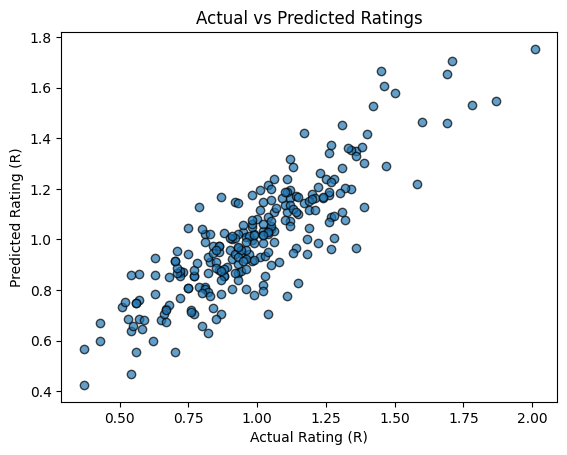


Top 10 Players by Rating:
        Player  Rating  Kills  Assists  Average Combat Score  Clutch Success %
411     Melser    2.45     22        7                   394              0.67
238    Alfajer    2.12     24        3                   408              0.00
931     Smoggy    2.01     21       10                   331              1.00
947   f0rsakeN    1.88     21        3                   308              1.00
1108     Kicks    1.87     22       13                   299              0.50
766      Kicks    1.87     22       13                   299              0.50
7         Wo0t    1.84     18        4                   289              0.00
567      RieNs    1.78     28        7                   302              0.40
286    MiniBoo    1.73     20        1                   270              0.25
832     Smoggy    1.71     23        6                   274              0.25

Top 10 Players by Average Rating:
       Player  Rating  Kills  Assists  Average Combat Score  Clutch S

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Function to convert percentage strings to float
def convert_percentage_to_float(percentage_str):
    if isinstance(percentage_str, str) and '%' in percentage_str:
        return float(percentage_str.replace('%', '')) / 100
    return float(percentage_str)

# Load the dataset
file_path = r'valorant_data/vct_2024/players_stats/players_stats.csv'  # Make sure this path points to the correct dataset
data = pd.read_csv(file_path)

# Filter data for the specific tournament
data = data[data['Tournament'] == 'Valorant Champions 2024']

# Apply the percentage conversion function to the relevant columns
data['Clutch Success %'] = data['Clutch Success %'].apply(convert_percentage_to_float)

# Select the relevant features and target variable
features = ['Kills', 'Assists', 'Average Combat Score', 'Clutch Success %']
target = 'Rating'

# Drop rows with missing values in any of the features or target
data_clean = data.dropna(subset=features + [target])

# Prepare the feature matrix (X) and target vector (y)
X = data_clean[features]
y = data_clean[target]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R²: {r2}")

# Visualize the actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.xlabel('Actual Rating (R)')
plt.ylabel('Predicted Rating (R)')
plt.title('Actual vs Predicted Ratings')
plt.show()

# List the top-rated players
top_players = data_clean.sort_values(by='Rating', ascending=False).head(10)
print("\nTop 10 Players by Rating:")
print(top_players[['Player', 'Rating', 'Kills', 'Assists', 'Average Combat Score', 'Clutch Success %']])

#average
player_aggregated = data_clean.groupby('Player').agg({
    'Rating': 'mean',
    'Kills': 'mean',
    'Assists': 'mean',
    'Average Combat Score': 'mean',
    'Clutch Success %': 'mean'
}).reset_index()

# Sort players by their average rating
top_players = player_aggregated.sort_values(by='Rating', ascending=False).head(10)

print("\nTop 10 Players by Average Rating:")
print(top_players.round(2))

Yearly Average Ratings:
   Year    Rating
0  2021  0.999196
1  2022  0.987612
2  2023  0.997943
3  2024  0.985019

Mean Squared Error (Yearly Regression): 2.561632617079936e-05
R² (Yearly Regression): 0.3359479077474341

Future Predictions:
   Year  Predicted Rating
0  2025          0.984393
1  2026          0.981173
2  2027          0.977953
3  2028          0.974733


C:\Users\Russell Palma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


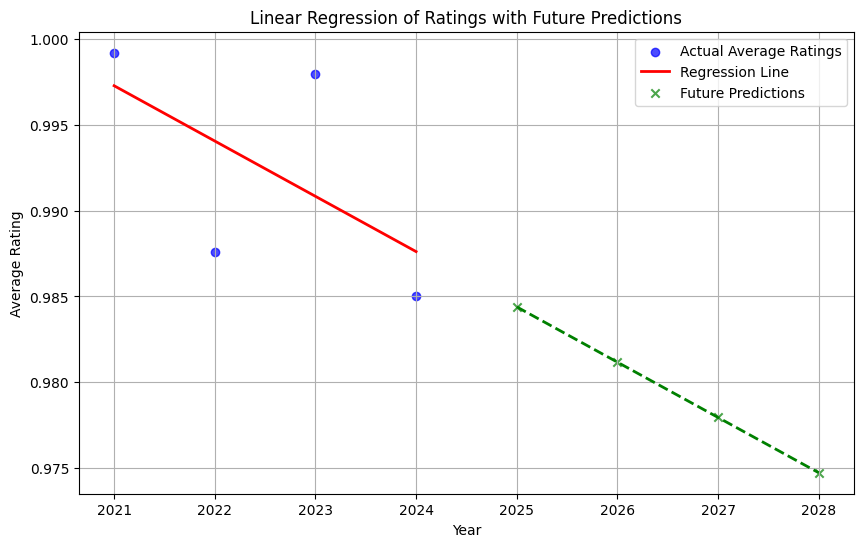

In [27]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def convert_percentage_to_float(percentage_str):
    """
    Convert percentage string to float
    """
    if pd.isna(percentage_str):
        return None
    return float(percentage_str.strip('%')) / 100 if '%' in str(percentage_str) else float(percentage_str)

# Paths to the CSV files for different years
folder_paths = [
    r'valorant_data\vct_2024\players_stats\players_stats.csv',
    r'valorant_data\vct_2023\players_stats\players_stats.csv',
    r'valorant_data\vct_2022\players_stats\players_stats.csv',
    r'valorant_data\vct_2021\players_stats\players_stats.csv'
]

# Tournaments to filter
tournaments = [
    'Valorant Champions 2024',
    'Valorant Champions 2023',
    'Valorant Champions 2022',
    'Valorant Champions 2021'
]

# Initialize an empty list to store DataFrames
dataframes = []

# Read and filter CSV files for Valorant Champions tournaments
for path in folder_paths:
    try:
        # Read the CSV file
        df = pd.read_csv(path)
        
        # Filter for specific Valorant Champions tournaments
        df_filtered = df[df['Tournament'].isin(tournaments)].copy()
        
        # Add a Year column based on the file path
        if not df_filtered.empty:
            df_filtered.loc[:, 'Year'] = int(path.split('vct_')[-1].split('\\')[0])
            
            # Append to dataframes list
            dataframes.append(df_filtered)
    except Exception as e:
        print(f"Error processing {path}: {e}")

# Combine all filtered DataFrames into one
if dataframes:
    data = pd.concat(dataframes, ignore_index=True)
    
    # Clean and process data
    data['Clutch Success %'] = data['Clutch Success %'].apply(convert_percentage_to_float)
    data_clean = data.dropna(subset=['Rating'])
    
    # Group by year and calculate the average rating
    yearly_avg_rating = data_clean.groupby('Year')['Rating'].mean().reset_index()
    
    print("Yearly Average Ratings:")
    print(yearly_avg_rating)
    
    # Check if we have more than one year of data
    if len(yearly_avg_rating) > 1:
        # Prepare the feature matrix (X) and target vector (y)
        X_year = yearly_avg_rating[['Year']]
        y_rating = yearly_avg_rating['Rating']
        
        # Perform linear regression
        lin_reg_year = LinearRegression()
        lin_reg_year.fit(X_year, y_rating)
        
        # Predict ratings for the span of years
        y_pred_year = lin_reg_year.predict(X_year)
        
        # Evaluate the model
        mse_year = mean_squared_error(y_rating, y_pred_year)
        r2_year = r2_score(y_rating, y_pred_year)
        
        print(f"\nMean Squared Error (Yearly Regression): {mse_year}")
        print(f"R² (Yearly Regression): {r2_year}")
        
        # Prepare future years for prediction
        future_years = np.array([[2025], [2026], [2027], [2028]])
        future_predictions = lin_reg_year.predict(future_years)
        
        # Create a DataFrame for future predictions
        future_predictions_df = pd.DataFrame({
            'Year': future_years.flatten(),
            'Predicted Rating': future_predictions
        })
        
        print("\nFuture Predictions:")
        print(future_predictions_df)
        
        # Visualize the yearly average ratings with the regression line and future predictions
        plt.figure(figsize=(10, 6))
        
        # Plot historical data
        plt.scatter(X_year, y_rating, color='blue', label='Actual Average Ratings', alpha=0.7)
        plt.plot(X_year, y_pred_year, color='red', label='Regression Line', linewidth=2)
        
        # Plot future predictions
        plt.scatter(future_years, future_predictions, color='green', label='Future Predictions', alpha=0.7, marker='x')
        plt.plot(future_years, future_predictions, color='green', linestyle='--', linewidth=2)
        
        plt.xlabel('Year')
        plt.ylabel('Average Rating')
        plt.title('Linear Regression of Ratings with Future Predictions')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("Not enough data points for regression analysis")
else:
    print("No data found for Valorant Champions tournaments")

### diri unta ang explaination pero kapoy

# Apriori
## Eco Rounds
### Remaining Credits, Loadout Value, Outcome

In [17]:
#import the modules
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

def convert_to_numeric(value):
    """Convert string values like '24.7k' to numerical values like 24700"""
    if isinstance(value, str):
        if 'k' in value.lower():
            return float(value.lower().replace('k', '').strip()) * 1000
        elif 'm' in value.lower():
            return float(value.lower().replace('m', '').strip()) * 1000000
        # Add more cases as needed (e.g., handling 'b' for billions)
    return pd.to_numeric(value, errors='coerce')

# Load the eco_rounds.csv file
file_path = r'valorant_data\vct_2024\matches\eco_rounds.csv'
eco_rounds = pd.read_csv(file_path)

# Convert 'Loadout Value' and 'Remaining Credits' to numeric using the function
eco_rounds['Loadout Value'] = eco_rounds['Loadout Value'].apply(convert_to_numeric)
eco_rounds['Remaining Credits'] = eco_rounds['Remaining Credits'].apply(convert_to_numeric)

# Handle any missing values (e.g., drop rows with missing values)
eco_rounds.dropna(subset=['Loadout Value', 'Remaining Credits', 'Outcome'], inplace=True)

# Convert Outcome to a binary value (1 for win, 0 for loss, assuming 'Outcome' is categorical)
eco_rounds['Outcome'] = eco_rounds['Outcome'].apply(lambda x: 1 if x == 'Win' else 0)

# Show a snapshot of the data
eco_rounds.head()

# First, we need to encode the data into a format suitable for Apriori
# For simplicity, let's encode 'Loadout Value', 'Remaining Credits' as categorical (binned)
eco_rounds['Loadout Value Binned'] = pd.cut(eco_rounds['Loadout Value'], bins=5, labels=['Low', 'Medium', 'High', 'Very High', 'Max'])
eco_rounds['Remaining Credits Binned'] = pd.cut(eco_rounds['Remaining Credits'], bins=5, labels=['Low', 'Medium', 'High', 'Very High', 'Max'])

# Encode categorical columns into dummy variables
basket = pd.get_dummies(eco_rounds[['Loadout Value Binned', 'Remaining Credits Binned', 'Outcome']])

# Apply Apriori algorithm to find frequent item sets
frequent_itemsets = apriori(basket, min_support=0.1, use_colnames=True)

# Find association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=10000)

# Show the resulting rules
rules.head()

C:\Users\Russell Palma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Loadout Value Binned_Very High),(Outcome),0.592571,0.500000,0.325897,0.549971,1.099941,1.0,0.029611,1.111039,0.223010,0.425078,0.099941,0.600882
1,(Outcome),(Loadout Value Binned_Very High),0.500000,0.592571,0.325897,0.651793,1.099941,1.0,0.029611,1.170078,0.181721,0.425078,0.145356,0.600882
2,(Remaining Credits Binned_Low),(Loadout Value Binned_Low),0.625717,0.148896,0.121632,0.194388,1.305527,1.0,0.028465,1.056469,0.625264,0.186271,0.053450,0.505639
3,(Loadout Value Binned_Low),(Remaining Credits Binned_Low),0.148896,0.625717,0.121632,0.816890,1.305527,1.0,0.028465,2.044038,0.274967,0.186271,0.510772,0.505639
4,(Remaining Credits Binned_Low),(Loadout Value Binned_High),0.625717,0.141798,0.117460,0.187720,1.323859,1.0,0.028734,1.056535,0.653603,0.180692,0.053510,0.508041


### kapoy gihapon explain